<IPython.core.display.Javascript object>


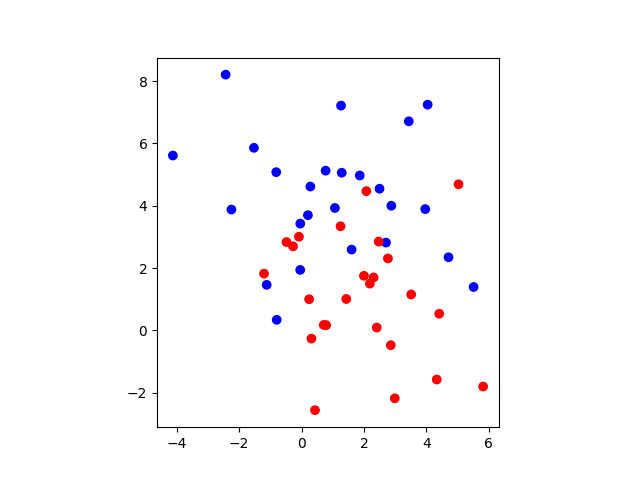

In [41]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib notebook
plt.rcParams['image.cmap'] = "bwr"

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)

<IPython.core.display.Javascript object>


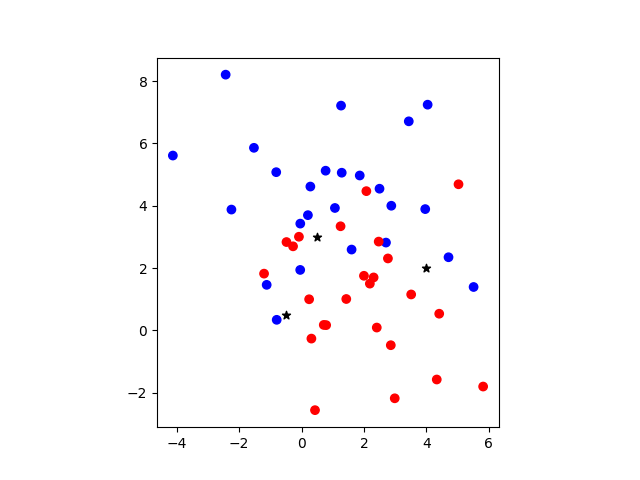

In [84]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")

<IPython.core.display.Javascript object>


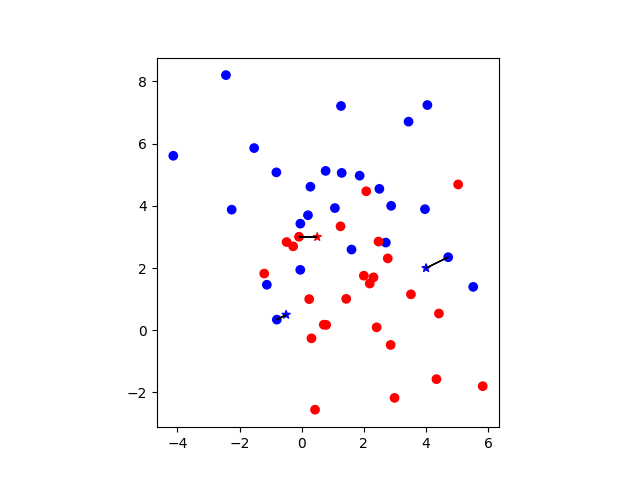

In [42]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure()
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)    
plot_n_neighbors(X, y)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.77


<IPython.core.display.Javascript object>


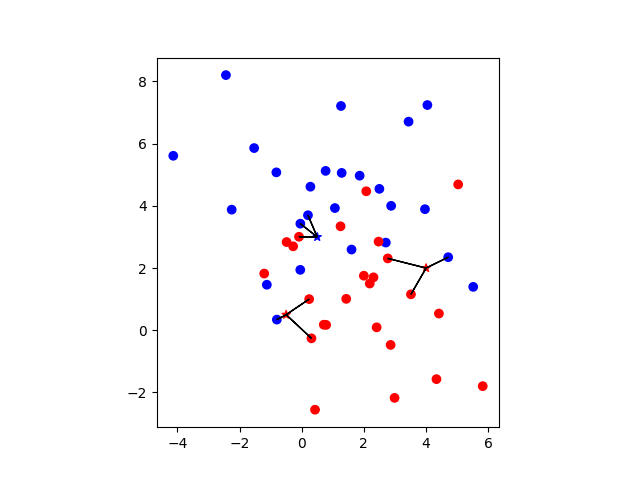

In [45]:
plot_n_neighbors(X, y, n_neighbors=3)

In [46]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:                                                                                                              
      eps = X.std() / 2.                                                                                                       

    if ax is None:                                                                                                               
      ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())  

<IPython.core.display.Javascript object>


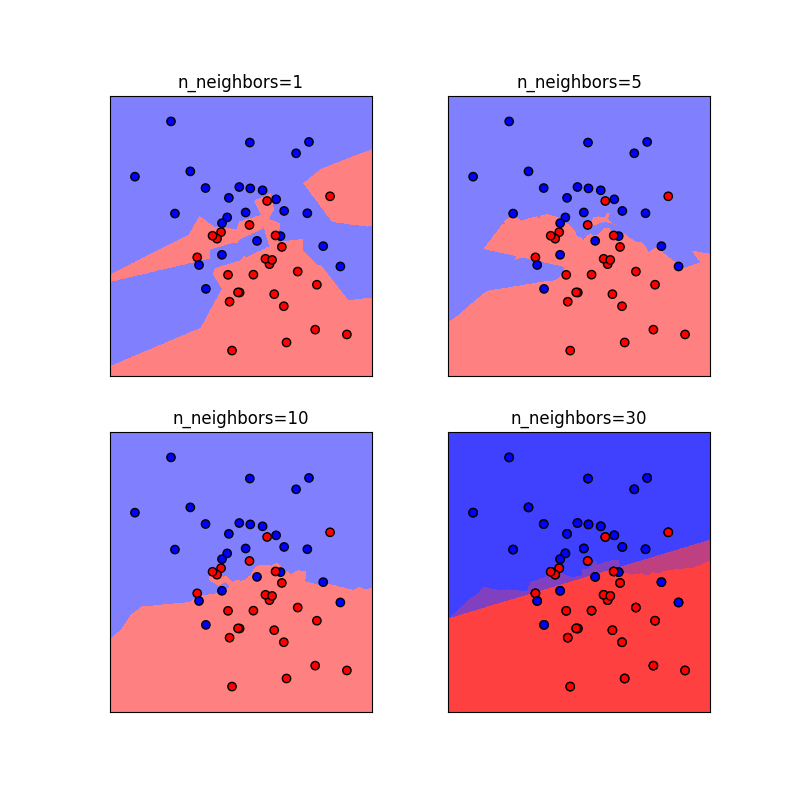

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title("n_neighbors={}".format(n_neighbors))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")


In [80]:

neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


<IPython.core.display.Javascript object>


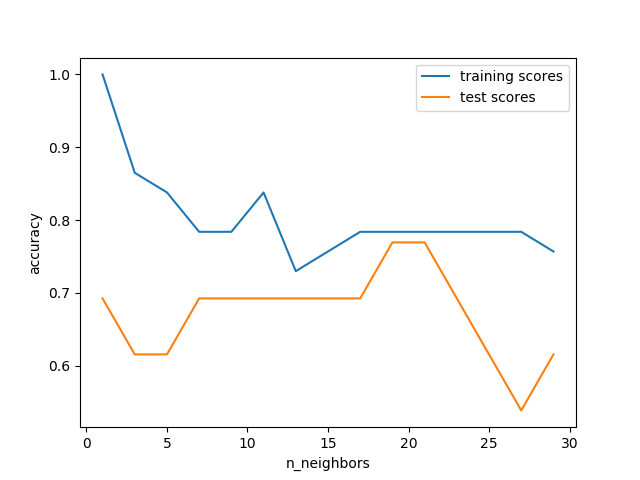

In [82]:
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

<IPython.core.display.Javascript object>


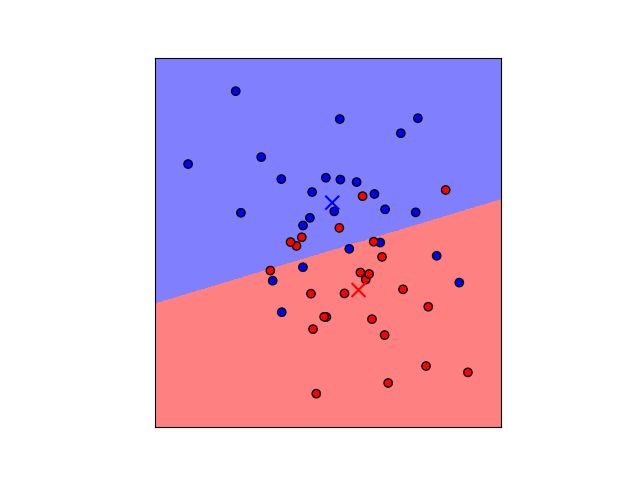

In [122]:
from sklearn.neighbors import NearestCentroid
plt.figure()
nc = NearestCentroid()
nc.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plot_2d_classification(nc, X, alpha=.5)
plt.gca().set_aspect("equal")
plt.scatter(nc.centroids_[:, 0], nc.centroids_[:, 1], c=['b', 'r'], s=100, marker='x')

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
print("accuracy: {:.2f}".format(nc.score(X_test, y_test)))

accuracy: 0.77


<IPython.core.display.Javascript object>


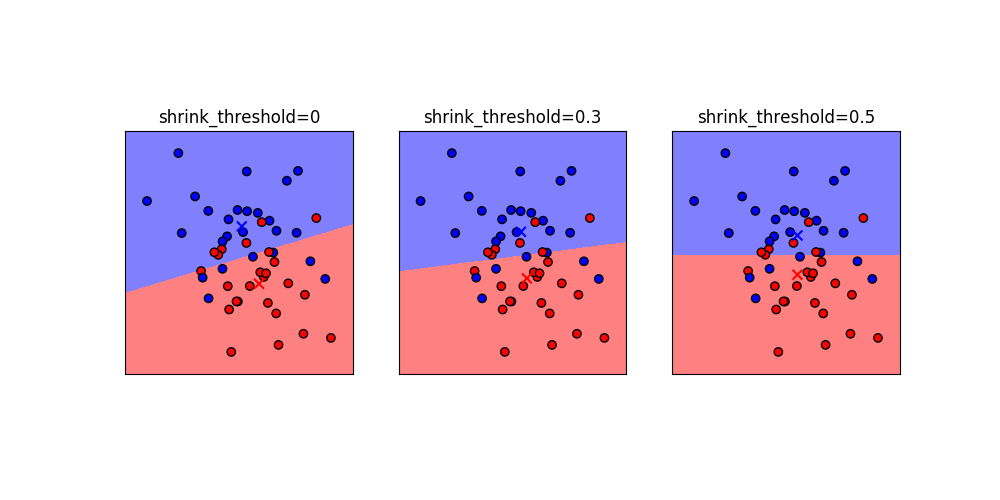

In [121]:
from sklearn.neighbors import NearestCentroid
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
thresholds = [0, 0.3, .5]

for threshold, ax in zip(thresholds, axes):
    ax.set_title("shrink_threshold={}".format(threshold))
    nc = NearestCentroid(shrink_threshold=threshold)
    nc.fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(nc, X, alpha=.5, ax=ax)
    ax.scatter(nc.centroids_[:, 0], nc.centroids_[:, 1], c=['b', 'r'], s=50, marker='x')
    ax.set_aspect("equal")

In [130]:
def soft_threshold(x, threshold):
    out = np.sign(x) * (np.abs(x) - threshold)
    mask = np.abs(x) < threshold
    out[mask] = 0
    return out

<IPython.core.display.Javascript object>


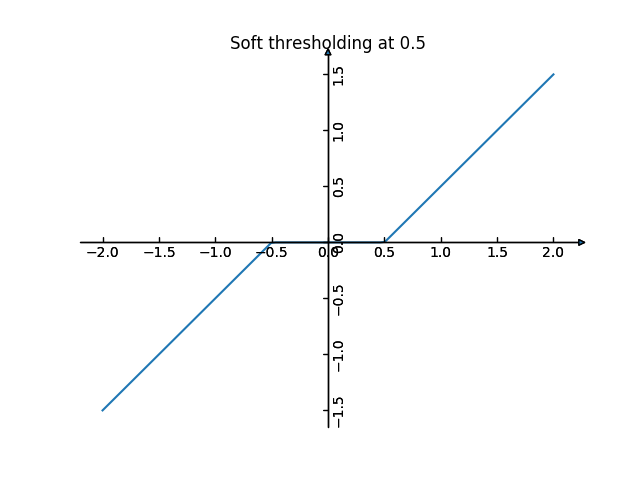

In [155]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
lin = np.linspace(-2, 2, 100)
fig.add_subplot(ax)
for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)


ax.plot(lin, soft_threshold(lin, .5))
ax.set_title("Soft thresholding at 0.5")

In [157]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)
nc = NearestCentroid().fit(X, y)

<IPython.core.display.Javascript object>


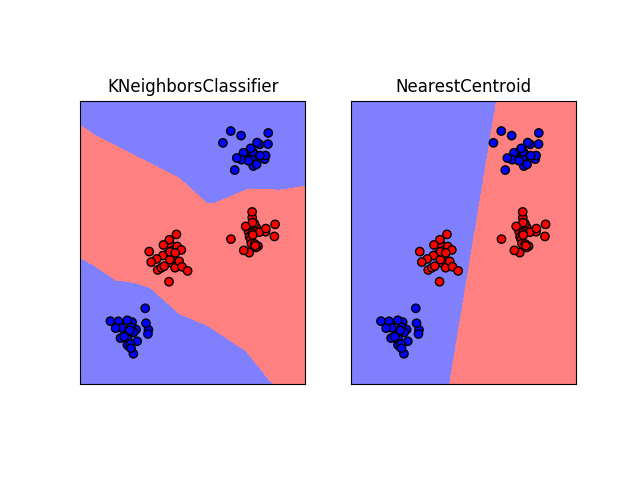

In [161]:
plt.figure
fig, axes = plt.subplots(1, 2)
for est, ax in [(knn, axes[0]), (nc, axes[1])]:
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    
    ax.set_title(est.__class__.__name__)
    plot_2d_classification(est, X, alpha=.5, ax=ax)
    ax.set_aspect("equal")


In [185]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale

data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [210]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print("Validation: {:.3f}".format(knn.score(X_val, y_val)))
print("Test: {:.3f}".format(knn.score(X_test, y_test)))

Validation: 0.963
Test: 0.972


In [211]:
val = []
test = []

for i in range(1000):
    rng = np.random.RandomState(i)
    noise = rng.normal(scale=.1, size=X_train.shape)
    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train + noise, y_train)
    val.append(knn.score(X_val, y_val))
    test.append(knn.score(X_test, y_test))

print("Validation: {:.3f}".format(np.max(val)))
print("Test: {:.3f}".format(test[np.argmax(val)]))

Validation: 0.991
Test: 0.958


<IPython.core.display.Javascript object>


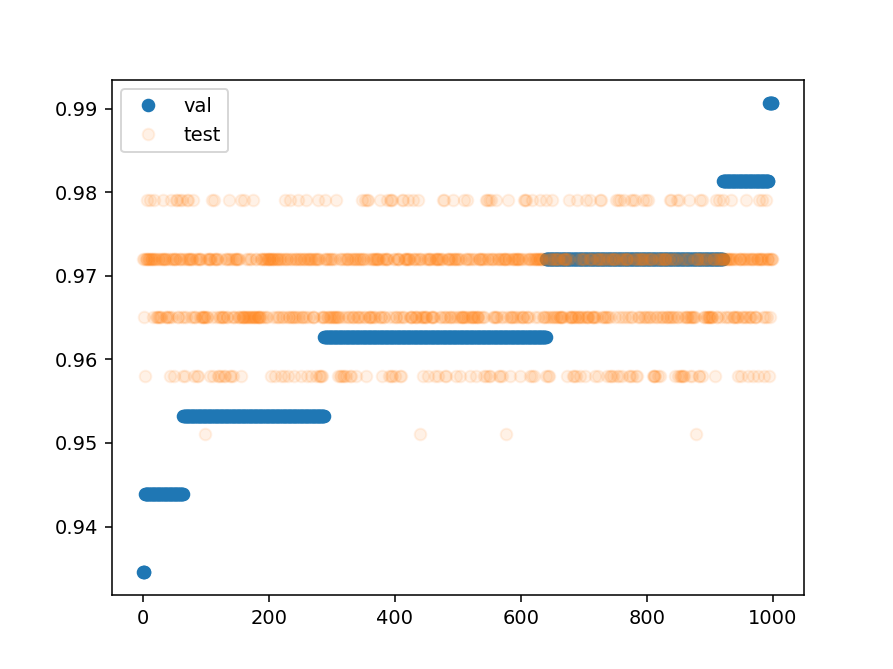

In [217]:
plt.figure()
sorting = np.argsort(val)
plt.plot(np.array(val)[sorting], "o", label="val")
plt.plot(np.array(test)[sorting], "o", label="test", alpha=.1)

plt.legend()

In [220]:
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.972
best n_neighbors: 3
test-set score: 0.965


# Cross validation

In [228]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=10)
    cross_val_scores.append(np.mean(scores))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.972
best n_neighbors: 3
test-set score: 0.972


<IPython.core.display.Javascript object>


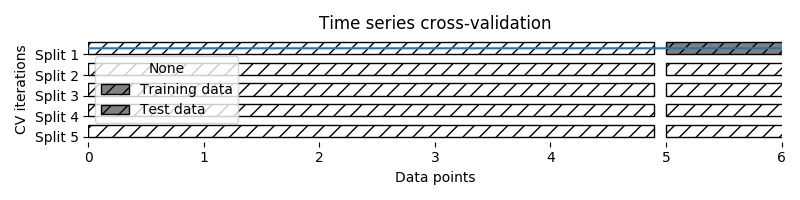

In [264]:
plt.figure(figsize=(8, 2))
plt.title("Time series cross-validation")
# don't think too much about how this figure is generated ...
axes = plt.gca()
axes.set_frame_on(False)

n_folds = 5
n_samples = 25

n_samples_per_fold = n_samples / float(n_folds)


for i in range(n_folds + 1):
    therange = range(max(i - 1, 0), n_folds)
    colors = ["w"] * len(therange)
    if i != 0:
        colors[0] = "grey"
    
    bars = plt.barh(bottom=therange, width=[n_samples_per_fold - 0.1] * len(therange),
           left=i * n_samples_per_fold, height=.6, color=colors, hatch="//", edgecolor='k')
axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1 + n_samples_per_fold)
plt.ylabel("CV iterations")
plt.xlabel("Data points")
plt.yticks(np.arange(n_folds) + .3, ["Split %d" % x for x in range(1, n_folds + 1)])
plt.legend([bars[0], bars[-1]], ['Training data', 'Test data'], loc=(1.05, 0.4), frameon=False);
plt.tight_layout()

In [270]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)

print("KFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=kfold)))

print("StratifiedKFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=skfold)))

print("ShuffleSplit:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=ss)))


KFold:
[ 0.92982456  0.95614035  0.96491228  0.98245614  0.96460177]
StratifiedKFold:
[ 0.95652174  0.9826087   0.95575221  0.99115044  0.95575221]
ShuffleSplit:
[ 0.98245614  0.95321637  0.97076023  0.95321637  0.97660819  0.96491228
  0.97076023  0.92982456  0.94736842  0.97660819  0.97660819  0.95321637
  0.95906433  0.97076023  0.94736842  0.9122807   0.95906433  0.93567251
  0.95906433  0.94152047]


In [277]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'n_neighbors':  np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.967
best parameters: {'n_neighbors': 7}
test-set score: 0.951


In [281]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

In [283]:
results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_n_neighbors', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [285]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

In [295]:
len(results)

7

<IPython.core.display.Javascript object>


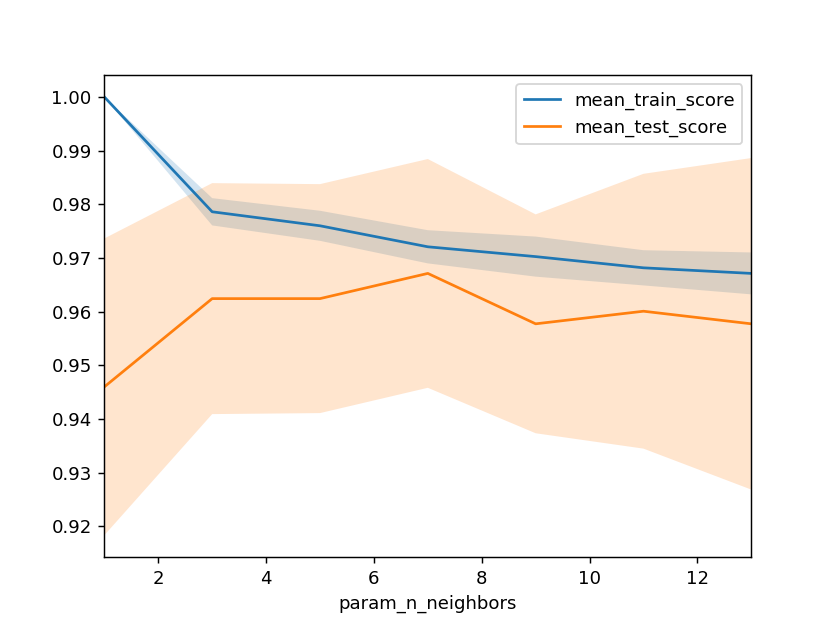

In [314]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()